IS 362 – Week 8 Assignment
ALL THINGS CARS!

In [6]:
import pandas as pd

# load in auto mpg as df and show (with minor cleanup)
file_path = r'~/is362/Week 8 Assignment/auto-mpg.data'
column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
    'acceleration', 'model_year', 'origin', 'car_name'
]
df = pd.read_csv(file_path, sep=r'\s+', names=column_names)
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [9]:
import numpy as np

# Handle the '?' horsepower data to numeric
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = pd.to_numeric(df['horsepower'])

# Check for missing values after these changes
print(df.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


No Missing Values!

In [10]:
# Relabel 1 2 and 3 with specific regions
df['origin'] = df['origin'].replace({1: 'USA', 2: 'Asia', 3: 'Europe'})
print(df['origin'].value_counts())

origin
USA       249
Europe     79
Asia       70
Name: count, dtype: int64


Rename successful!

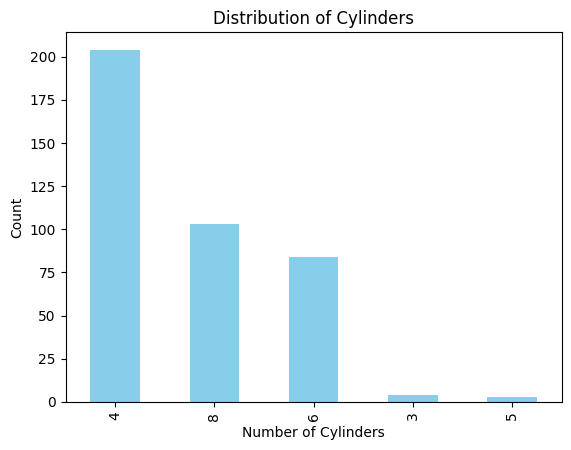

In [16]:
import matplotlib.pyplot as plt

# Bar chart for distribution of cylinders
df['cylinders'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Count')
plt.show()

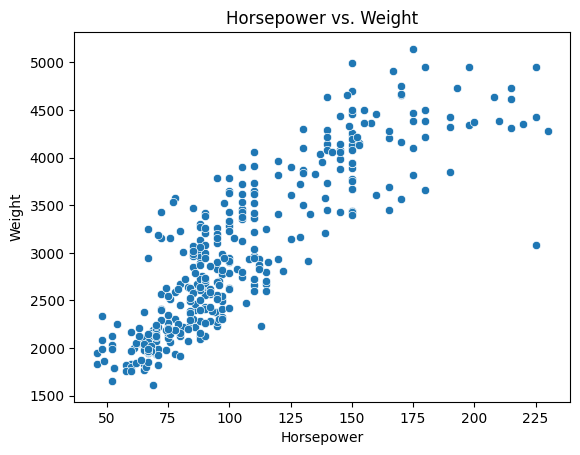

In [21]:
import seaborn as sns

# Scatterplot for weight vs hp
sns.scatterplot(x='horsepower', y='weight', data=df)
plt.title('Horsepower vs. Weight')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.show()

Now, lets make a scatterplot looking at mpg vs horsepower. We will fit a a line of best fit through the data and report on the r^2 and statistical significance of the slope of that line.

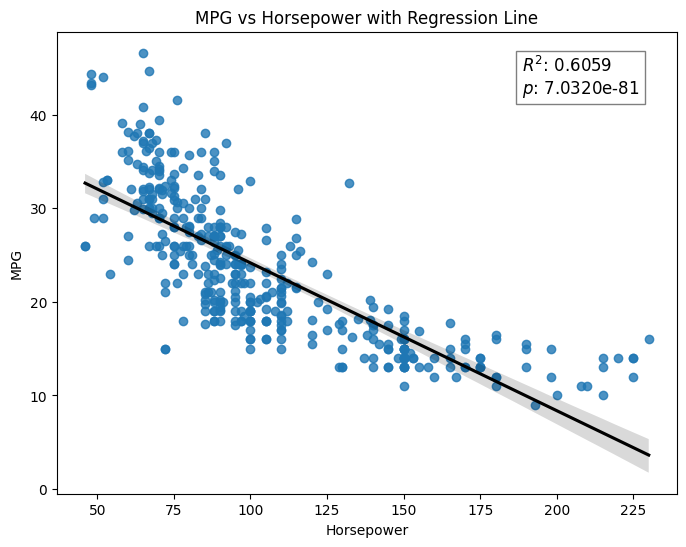

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# data is "cleaned" but rows with missing values must be dropped first
df = df[['horsepower', 'mpg']].dropna()

# Scatterplot with line
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=df, line_kws={"color": "black"})

# Linear regression to get r^2 and p-value
slope, intercept, r_value, p_value, std_err = linregress(df['horsepower'].dropna(), df['mpg'].dropna())
textstr = f'$R^2$: {r_value**2:.4f}\n$p$: {p_value:.4e}'
plt.text(0.75, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.5))

# Make prettier
plt.title('MPG vs Horsepower with Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

This graph tells us that mpg and horsepower do seem to be strongly negatively correlated. It seems that cars with higher hp seem to have a lower mpg (burn more fuel). A lot of the variation is also explained by horsepower here, as shown by the r^2. It does seem that things taper off after a certain point (~150 hp). Perhaps a non liner model may be better here...